# Analysis of Data Collected in the Planetary Exploration Simulation

Made by: Nicolas Mangas, Pablo Ceballos y Raúl Salas

3º ADEINF CUNEF

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

In [10]:
exploration = pd.read_csv("../results.csv")
display(exploration)

,Planet,Exploration,Water_prob,Mineral_prob,Accident_prob,Water_gathered,Mineral_gathered,Total_gathered,Lost_rovers
0,1.0,1.0,0.025,0.05,0.015,5.0,5.0,10.0,3.0
1,1.0,2.0,0.025,0.05,0.015,11.0,9.0,20.0,3.0
2,1.0,3.0,0.025,0.05,0.015,4.0,12.0,16.0,4.0
3,1.0,4.0,0.025,0.05,0.015,10.0,9.0,19.0,1.0
4,1.0,5.0,0.025,0.05,0.015,3.0,12.0,15.0,4.0
...,...,...,...,...,...,...,...,...,...
535,27.0,16.0,0.050,0.10,0.005,12.0,26.0,38.0,0.0
536,27.0,17.0,0.050,0.10,0.005,5.0,13.0,18.0,0.0
537,27.0,18.0,0.050,0.10,0.005,7.0,11.0,18.0,2.0
538,27.0,19.0,0.050,0.10,0.005,11.0,19.0,30.0,1.0


In [11]:
exploration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Planet            540 non-null    float64
 1   Exploration       540 non-null    float64
 2   Water_prob        540 non-null    float64
 3   Mineral_prob      540 non-null    float64
 4   Accident_prob     540 non-null    float64
 5   Water_gathered    540 non-null    float64
 6   Mineral_gathered  540 non-null    float64
 7   Total_gathered    540 non-null    float64
 8   Lost_rovers       540 non-null    float64
dtypes: float64(9)
memory usage: 38.1 KB


<function matplotlib.pyplot.show(close=None, block=None)>

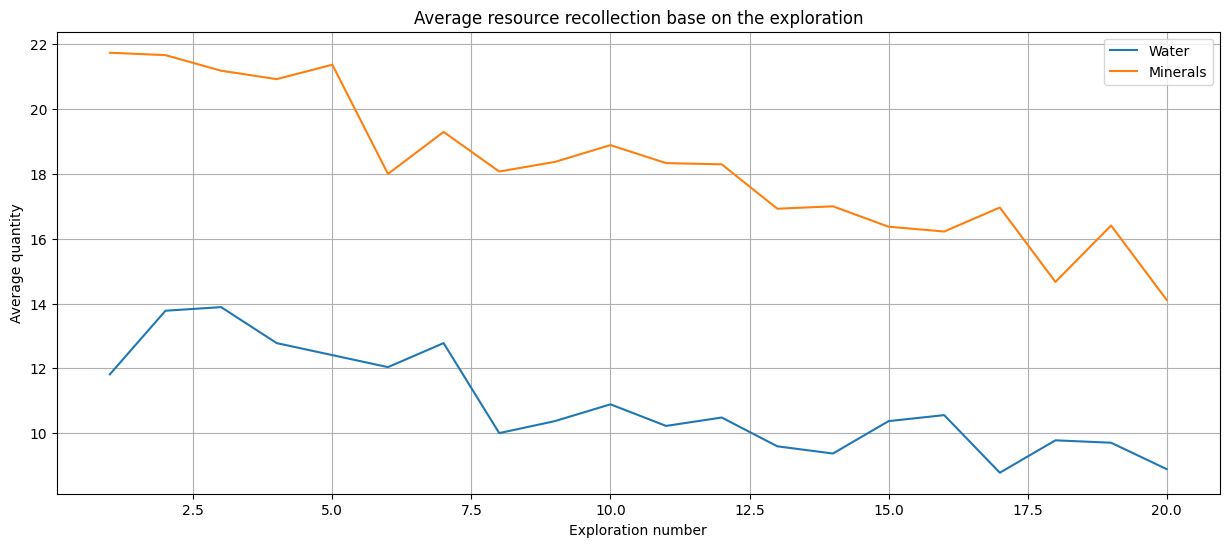

In [12]:
stats0= exploration.groupby('Exploration').agg({'Water_gathered':'mean','Mineral_gathered':'mean'}).reset_index()
stats0.columns=['Exploration', 'water_mean', 'mineral_mean']
plt.figure(figsize=(15,6))
plt.plot(stats0['Exploration'], stats0['water_mean'], label ='Water')
plt.plot(stats0['Exploration'], stats0['mineral_mean'], label ='Minerals')
plt.title('Average resource recollection base on the exploration')
plt.xlabel('Exploration number')
plt.ylabel('Average quantity')
plt.legend()
plt.grid(True)
plt.show

The previous graph shows the relationship between the average resources collected and the number of explorations. We can see that the more explorations we conduct, the fewer resources are gathered. This happens because later explorations cannot collect resources that were already obtained in previous ones. This data can help us estimate the optimal number of explorations to perform on each planet.

<function matplotlib.pyplot.show(close=None, block=None)>

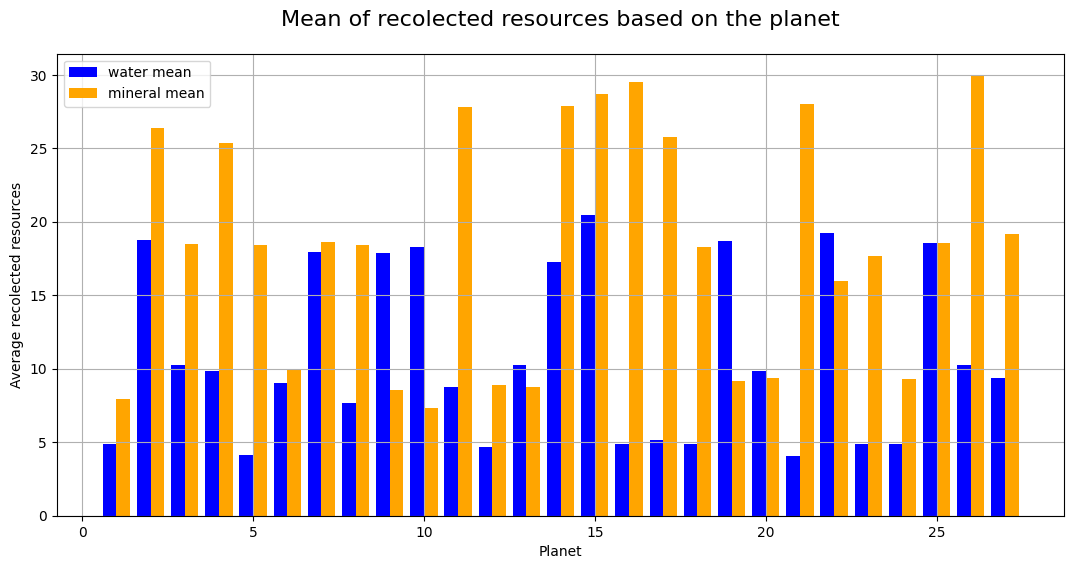

In [13]:
stats3= exploration.groupby('Planet').agg({'Water_gathered':'mean','Mineral_gathered':'mean'}).reset_index()
stats3.columns=['Planet', 'water_mean', 'mineral_mean']

plt.figure(figsize=(13,6))
plt.bar(stats3['Planet'] - 0.2, stats3['water_mean'], width=0.4, label='water mean', color='blue')
plt.bar(stats3['Planet'] + 0.2, stats3['mineral_mean'], width=0.4, label='mineral mean', color='orange')
plt.title('Mean of recolected resources based on the planet', fontsize=16, pad=20)
plt.xlabel('Planet')
plt.ylabel('Average recolected resources')
plt.legend()
plt.grid(True)
plt.show

This graph compares water and mineral collection data based on the planet. By analyzing the graph, we can observe that most of the tallest bars are orange. From this, we can conclude that in most cases on these planets, we're able to collect more minerals than water. This information can help us decide which planets to explore based on what we want to extract. Knowing which planets have higher water content can serve as a reference point to investigate whether any form of life might exist in them.

<function matplotlib.pyplot.show(close=None, block=None)>

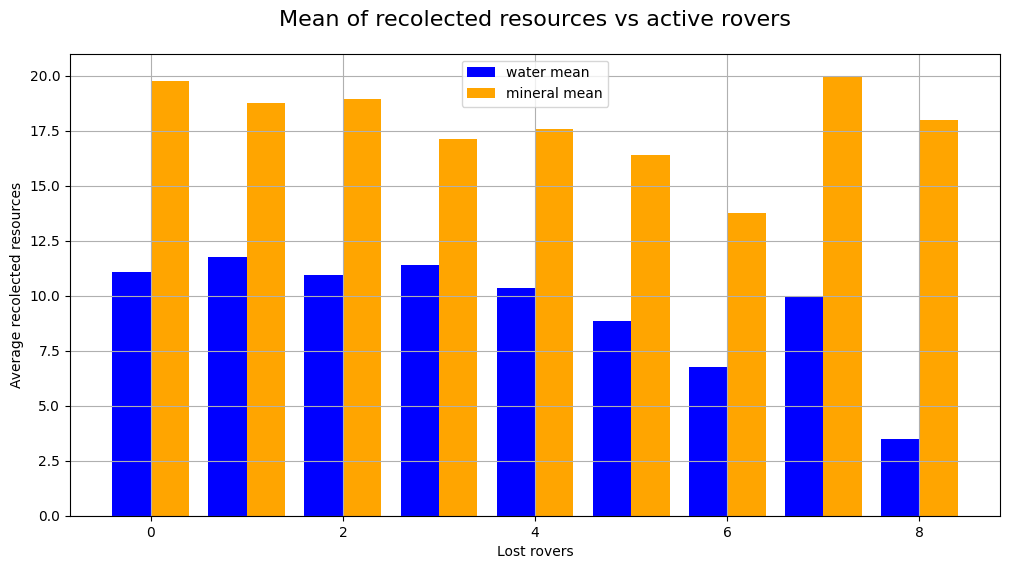

In [21]:
stats2= exploration.groupby('Lost_rovers').agg({'Water_gathered':'mean','Mineral_gathered':'mean'}).reset_index()
stats2.columns=['Lost_rovers', 'water_mean', 'mineral_mean']

plt.figure(figsize=(12,6))
plt.bar(stats2['Lost_rovers'] - 0.2, stats2['water_mean'], width=0.4, label='water mean', color='blue')
plt.bar(stats2['Lost_rovers'] + 0.2, stats2['mineral_mean'], width=0.4, label='mineral mean', color='orange')
plt.title('Mean of recolected resources vs active rovers', fontsize=16, pad=20)
plt.xlabel('Lost rovers')
plt.ylabel('Average recolected resources')
plt.legend()
plt.grid(True)
plt.show


This graph shows the average quantity of resources recollected based on the number of Rovers that have been lost during the exploration. The data demostrates a clear relationship between these two variabless, leading to the conclusion that, in most cases, a higher number of lost Rovers resulsts in less resource collection (this can be mainly noticed on the amount of water recollected). This correlation is also influenced by the initial resource availability on each planet.

In [ ]:
stats4= exploration.groupby('Planet').agg({'Lost_rovers':'mean'}).reset_index()
stats4.columns=['Planet', 'Lost_rovers']

plt.figure(figsize=(12,6))
plt.bar(stats2['Planet'], stats2['Lost_rovers'], width=0.4, color='Grey')
plt.title('Average number of rovers lost during the exploration base on the planet', fontsize=16, pad=20)
plt.xlabel('Planet')
plt.ylabel('Lost rovers')
plt.grid(True)
plt.show


This graph shows us on which planets a rover is most likely to get lost. This data can help us compare it with resource collection information and decide how many rovers to send or whether the exploration is worth undertaking. We can also take another perspective and see if we can improve the rovers' capabilities based on the characteristics of the planets with the highest loss rates.

<function matplotlib.pyplot.show(close=None, block=None)>

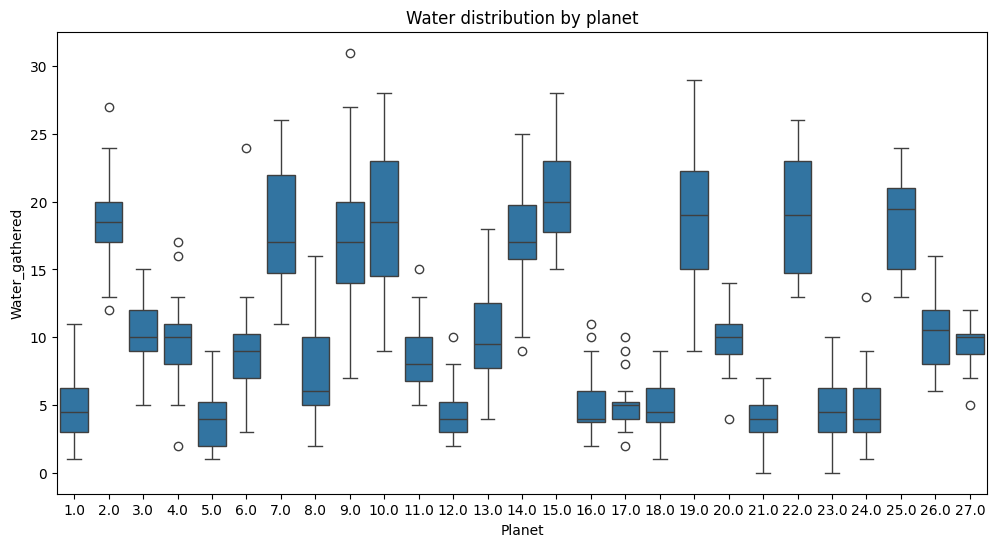

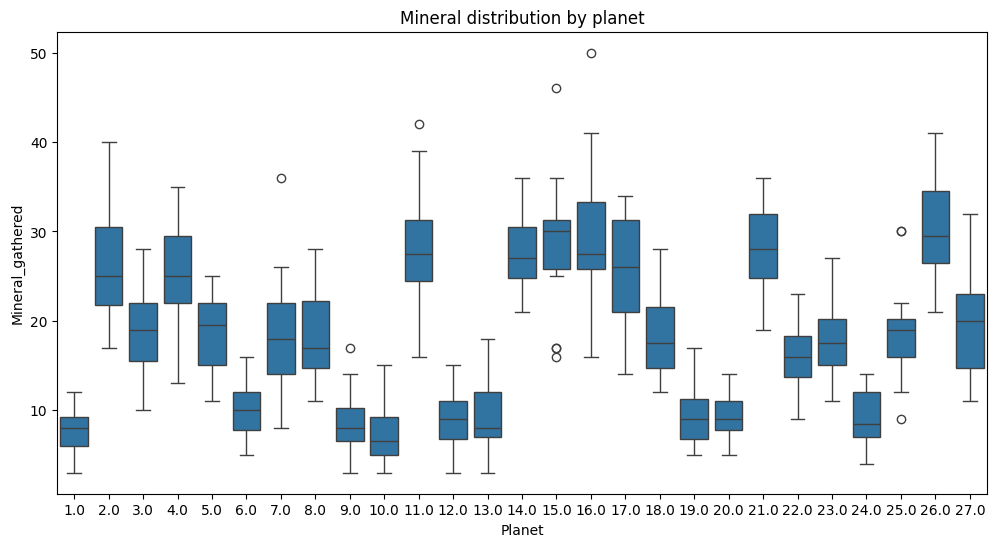

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=exploration, x='Planet', y='Water_gathered')
plt.title('Water distribution by planet')
plt.show
plt.figure(figsize=(12,6))
sns.boxplot(data=exploration, x='Planet', y='Mineral_gathered')
plt.title('Mineral distribution by planet')
plt.show

The previous box plots show us a lot of data, including the median, maximums and minimums of either water or mineral collection, but all based on the planet. The main data point in these diagrams, which the other graphs don't provide, are the outliers. These can be useful because by analyzing them and seeing what behaviors the rovers that performed the collection have followed, we can try to imitate them if the data is positive or configure them to avoid those types of behaviors if the recollected data is negative.

In [23]:
exploration.describe().T

,count,mean,std,min,25%,50%,75%,max
Planet,540.0,14.000000,7.796103,1.000,7.000,14.00,21.000,27.000
Exploration,540.0,10.500000,5.771628,1.000,5.750,10.50,15.250,20.000
Water_prob,540.0,0.058333,0.031209,0.025,0.025,0.05,0.100,0.100
Mineral_prob,540.0,0.100000,0.040863,0.050,0.050,0.10,0.150,0.150
Accident_prob,540.0,0.010000,0.004086,0.005,0.005,0.01,0.015,0.015
Water_gathered,540.0,10.924074,6.748309,0.000,5.000,10.00,16.000,31.000
Mineral_gathered,540.0,18.240741,9.149825,3.000,11.000,17.00,25.000,50.000
Total_gathered,540.0,29.164815,11.671631,5.000,20.000,28.00,37.000,73.000
Lost_rovers,540.0,2.187037,1.649259,0.000,1.000,2.00,3.000,8.000


The table on top shows a database that reveals key iformation gathered from the 100 planetary exploration missions such as:

Lost Rovers demonstrate that most of the Rovers are fully able of not getting lost during the exploration with a low mean and a low std, informing us that in most cases only little group of Rovers get lost. Also with 75% of missions maintaining more than half of the functional units.

Water and mineral recollection show a high variability. So we can not expect to use the data of the recolection to relate diff.

In the table we can se the mean of the different probabilities of the generation of minerals and water, and we can get to the conclusion that the probabilities for a mineral to  be generated is higher than the one for water. We can also see the max and minimum units recolected of water and mineral.

In [24]:
display(exploration.sort_values('Water_gathered',ascending=False).head(10))
display(exploration.sort_values('Water_gathered',ascending=False).tail(10))

,Planet,Exploration,Water_prob,Mineral_prob,Accident_prob,Water_gathered,Mineral_gathered,Total_gathered,Lost_rovers
170,9.0,11.0,0.1,0.05,0.010,31.0,17.0,48.0,1.0
360,19.0,1.0,0.1,0.05,0.005,29.0,13.0,42.0,1.0
362,19.0,3.0,0.1,0.05,0.005,28.0,9.0,37.0,1.0
197,10.0,18.0,0.1,0.05,0.015,28.0,5.0,33.0,3.0
185,10.0,6.0,0.1,0.05,0.015,28.0,7.0,35.0,3.0
285,15.0,6.0,0.1,0.15,0.010,28.0,34.0,62.0,1.0
281,15.0,2.0,0.1,0.15,0.010,27.0,46.0,73.0,0.0
26,2.0,7.0,0.1,0.15,0.005,27.0,29.0,56.0,2.0
163,9.0,4.0,0.1,0.05,0.010,27.0,13.0,40.0,0.0
161,9.0,2.0,0.1,0.05,0.010,27.0,9.0,36.0,1.0


,Planet,Exploration,Water_prob,Mineral_prob,Accident_prob,Water_gathered,Mineral_gathered,Total_gathered,Lost_rovers
356,18.0,17.0,0.025,0.10,0.010,2.0,12.0,14.0,1.0
457,23.0,18.0,0.025,0.10,0.005,2.0,17.0,19.0,0.0
472,24.0,13.0,0.025,0.05,0.005,1.0,9.0,10.0,3.0
91,5.0,12.0,0.025,0.10,0.015,1.0,12.0,13.0,5.0
7,1.0,8.0,0.025,0.05,0.015,1.0,8.0,9.0,3.0
444,23.0,5.0,0.025,0.10,0.005,1.0,15.0,16.0,1.0
84,5.0,5.0,0.025,0.10,0.015,1.0,19.0,20.0,3.0
349,18.0,10.0,0.025,0.10,0.010,1.0,24.0,25.0,4.0
445,23.0,6.0,0.025,0.10,0.005,0.0,21.0,21.0,1.0
419,21.0,20.0,0.025,0.15,0.010,0.0,21.0,21.0,1.0


These tables display the 10 best and worst explorations based on the amount of water collected. In both tables, we can see that several planets appear repeatedly, indicating that the most significant influencing factor is the amount of water originally generated on the planet, not other variables like lost rovers (as evidenced by the worst simulation losing just 1 rover). This data can be useful for cross-referencing with our previous analysis to select planets for exploration with greater certainty, based on what we aim to extract.

In [25]:
display(exploration.sort_values('Mineral_gathered',ascending=False).head(10))
display(exploration.sort_values('Mineral_gathered',ascending=False).tail(10))

,Planet,Exploration,Water_prob,Mineral_prob,Accident_prob,Water_gathered,Mineral_gathered,Total_gathered,Lost_rovers
300,16.0,1.0,0.025,0.15,0.015,5.0,50.0,55.0,2.0
281,15.0,2.0,0.100,0.15,0.010,27.0,46.0,73.0,0.0
205,11.0,6.0,0.050,0.15,0.010,8.0,42.0,50.0,0.0
506,26.0,7.0,0.050,0.15,0.005,11.0,41.0,52.0,2.0
302,16.0,3.0,0.025,0.15,0.015,9.0,41.0,50.0,2.0
23,2.0,4.0,0.100,0.15,0.005,20.0,40.0,60.0,1.0
202,11.0,3.0,0.050,0.15,0.010,15.0,39.0,54.0,1.0
504,26.0,5.0,0.050,0.15,0.005,10.0,38.0,48.0,0.0
303,16.0,4.0,0.025,0.15,0.015,10.0,38.0,48.0,1.0
507,26.0,8.0,0.050,0.15,0.005,13.0,37.0,50.0,0.0


,Planet,Exploration,Water_prob,Mineral_prob,Accident_prob,Water_gathered,Mineral_gathered,Total_gathered,Lost_rovers
256,13.0,17.0,0.050,0.05,0.010,6.0,4.0,10.0,4.0
199,10.0,20.0,0.100,0.05,0.015,10.0,4.0,14.0,5.0
168,9.0,9.0,0.100,0.05,0.010,18.0,4.0,22.0,3.0
232,12.0,13.0,0.025,0.05,0.010,6.0,4.0,10.0,3.0
478,24.0,19.0,0.025,0.05,0.005,3.0,4.0,7.0,0.0
177,9.0,18.0,0.100,0.05,0.010,7.0,3.0,10.0,3.0
195,10.0,16.0,0.100,0.05,0.015,23.0,3.0,26.0,2.0
237,12.0,18.0,0.025,0.05,0.010,2.0,3.0,5.0,0.0
19,1.0,20.0,0.025,0.05,0.015,5.0,3.0,8.0,4.0
245,13.0,6.0,0.050,0.05,0.010,16.0,3.0,19.0,0.0


These tables display the top 10 and bottom 10 explorations based on mineral quantities collected. Similar to the previous analysis, we observe recurring planets in the tables, leading us to the same conclusion: collection yields depend primarily on the planet's originally generated mineral deposits. This table serves the same analytical purpose as the water collection data, but focuses on minerals instead.

In [26]:
display(exploration.sort_values('Total_gathered',ascending=False).head(10))
display(exploration.sort_values('Total_gathered',ascending=False).tail(10))

,Planet,Exploration,Water_prob,Mineral_prob,Accident_prob,Water_gathered,Mineral_gathered,Total_gathered,Lost_rovers
281,15.0,2.0,0.100,0.15,0.010,27.0,46.0,73.0,0.0
285,15.0,6.0,0.100,0.15,0.010,28.0,34.0,62.0,1.0
284,15.0,5.0,0.100,0.15,0.010,25.0,36.0,61.0,0.0
23,2.0,4.0,0.100,0.15,0.005,20.0,40.0,60.0,1.0
262,14.0,3.0,0.100,0.15,0.015,24.0,36.0,60.0,2.0
260,14.0,1.0,0.100,0.15,0.015,24.0,36.0,60.0,1.0
121,7.0,2.0,0.100,0.10,0.015,20.0,36.0,56.0,4.0
26,2.0,7.0,0.100,0.15,0.005,27.0,29.0,56.0,2.0
280,15.0,1.0,0.100,0.15,0.010,23.0,32.0,55.0,1.0
300,16.0,1.0,0.025,0.15,0.015,5.0,50.0,55.0,2.0


,Planet,Exploration,Water_prob,Mineral_prob,Accident_prob,Water_gathered,Mineral_gathered,Total_gathered,Lost_rovers
7,1.0,8.0,0.025,0.05,0.015,1.0,8.0,9.0,3.0
469,24.0,10.0,0.025,0.05,0.005,3.0,6.0,9.0,0.0
119,6.0,20.0,0.050,0.05,0.015,4.0,5.0,9.0,1.0
18,1.0,19.0,0.025,0.05,0.015,2.0,6.0,8.0,1.0
10,1.0,11.0,0.025,0.05,0.015,3.0,5.0,8.0,5.0
19,1.0,20.0,0.025,0.05,0.015,5.0,3.0,8.0,4.0
235,12.0,16.0,0.025,0.05,0.010,3.0,5.0,8.0,6.0
478,24.0,19.0,0.025,0.05,0.005,3.0,4.0,7.0,0.0
479,24.0,20.0,0.025,0.05,0.005,2.0,5.0,7.0,2.0
237,12.0,18.0,0.025,0.05,0.010,2.0,3.0,5.0,0.0


These tables show the top 10 and bottom 10 explorations based on total resources collected. Once again, we see planets recurring in the tables. Together with the two previous tables, we can compare and determine which planets are most worthwhile to explore for optimal resource collection. With all this information, we could select planets to explore with high confidence of finding what we're looking for.